# Homework 2: Exoplanets

Osmer Alexander Suárez López

### 1. (15 points) Analysing properties of Exoplanets

##### 1. Download the relevant data. You can do this by either downloading the full catalogue from the website or trough python using ADQL commands.
##### 2. Make sure that you only have relevant data for planets. For this, think about the definition of a planet and exclude all data that does not satisfy the definition. Briefly describe your decision about excluding irrelevant data.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from reproject import reproject_interp
import csv
from astropy.io import ascii
import pandas as pd

In [2]:
data = pd.read_csv('exoplanet.eu_catalog.csv')

In [3]:
data.keys()

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [4]:
data_new = np.where(data['mass']<=13)

data_filtered = data.iloc[data_new[0]].reset_index(drop=True)

In [5]:
data_filtered.keys()

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

Here, we have excluded specific sections of data based on the mass of a planet. Here one characteristic of a planet is that the mass is not greater that 13 $M_J$, because after that point by the amount of mass present the object starter to burn Deuterium, so it is a brown dwarf.

##### 3. Make a scatter plot of Semi-major axis vs. Calculated temperature. And make histograms of both Semi-major axis and temperature.

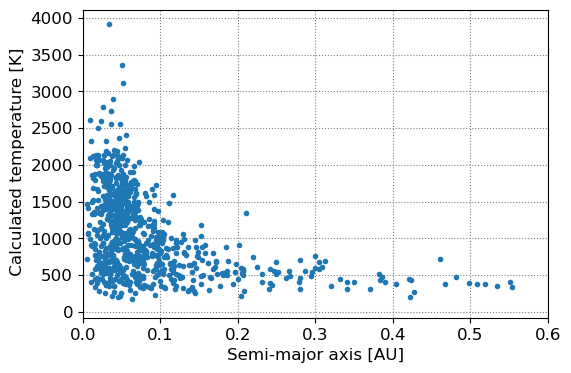

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data_filtered['semi_major_axis'], data_filtered['temp_calculated'], marker = '.', linestyle='')
plt.xlabel("Semi-major axis [AU]", fontsize=12)
plt.ylabel(' Calculated temperature [K]', fontsize=12)
plt.xlim(0,0.6)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In order to see in a better way the plot, we do the following:

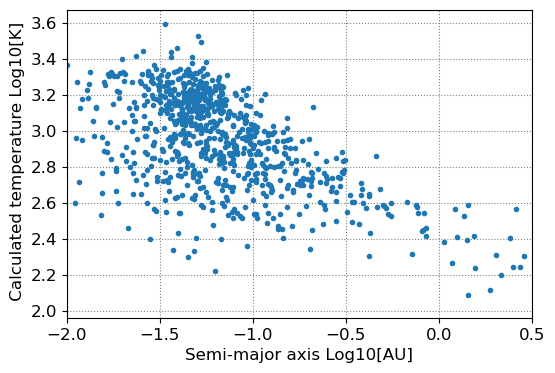

In [7]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log10(data_filtered['semi_major_axis']), np.log10(data_filtered['temp_calculated']), marker = '.', linestyle='')
plt.xlabel("Semi-major axis Log10[AU]", fontsize=12)
plt.ylabel(' Calculated temperature Log10[K]', fontsize=12)
plt.xlim(-2,0.5)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

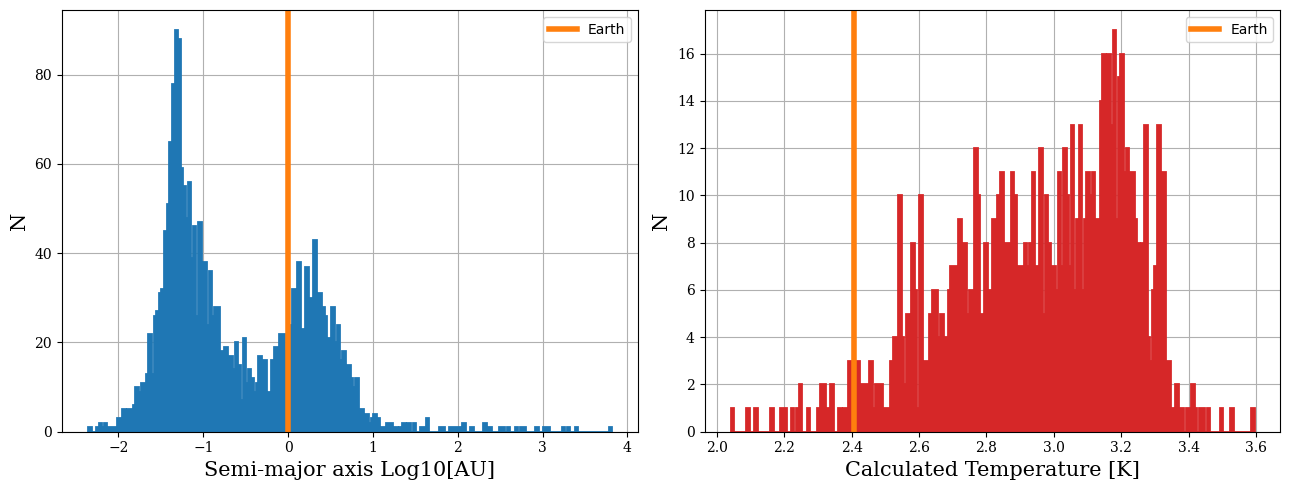

In [8]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data_filtered['semi_major_axis']
plt.hist(np.log10(d), bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(1), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax1.set_xlabel("Semi-major axis Log10[AU]", size=15,family='serif')
ax1.set_ylabel('N', size=15,family='serif')
plt.grid(True)
plt.legend()
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d1 = data_filtered['temp_calculated']
plt.hist(np.log10(d1), bins=200, histtype='step', color='C3', fill=True, linewidth=2)
plt.axvline(np.log10(255), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax2.set_xlabel('Calculated Temperature [K]', size=15,family='serif')
ax2.set_ylabel('N', size=15,family='serif')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

##### 4. What can you conlcude from the plots in #3? Is there a relation between the two parameters? Briefly explain what is the reason for the relation if there is one?

A relationship becomes apparent in the initial plot. Upon removing the ouliers by zooming within a specific range of values, this relationship exhibits characteristics indicative of a decaying exponential trend, nevertheless, in a log scale plot the relation seems to be linear, we can choose this plot due to the fact that it is easy to see and also to isolate the values by zooming the plot. This behavior might be attributed to the fact that when a planet is in close to its host star, it receives a greater amount of radiation, resulting in elevated temperatures. Conversely, as the planet moves farther away from the star, its temperature decreases. While scientific understanding acknowledges the influence of various factors, making a definitive correlation challenging, however, the relationship that was mentioned was observed in the second plot.


##### 5. Make a scatter plot of Effective temperature of the host star vs. planetary mass. Make histograms of both quantities.

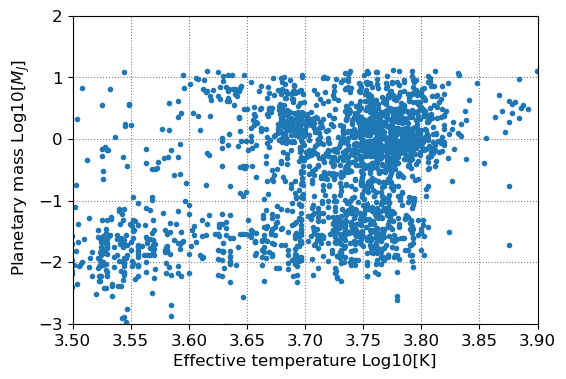

In [9]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log10(data_filtered['star_teff']), np.log10(data_filtered['mass']), marker = '.', linestyle='')
plt.xlabel("Effective temperature Log10[K]", fontsize=12)
plt.ylabel(' Planetary mass Log10[$M_J$]', fontsize=12)
plt.xlim(3.5,3.9)
plt.ylim(-3,2)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

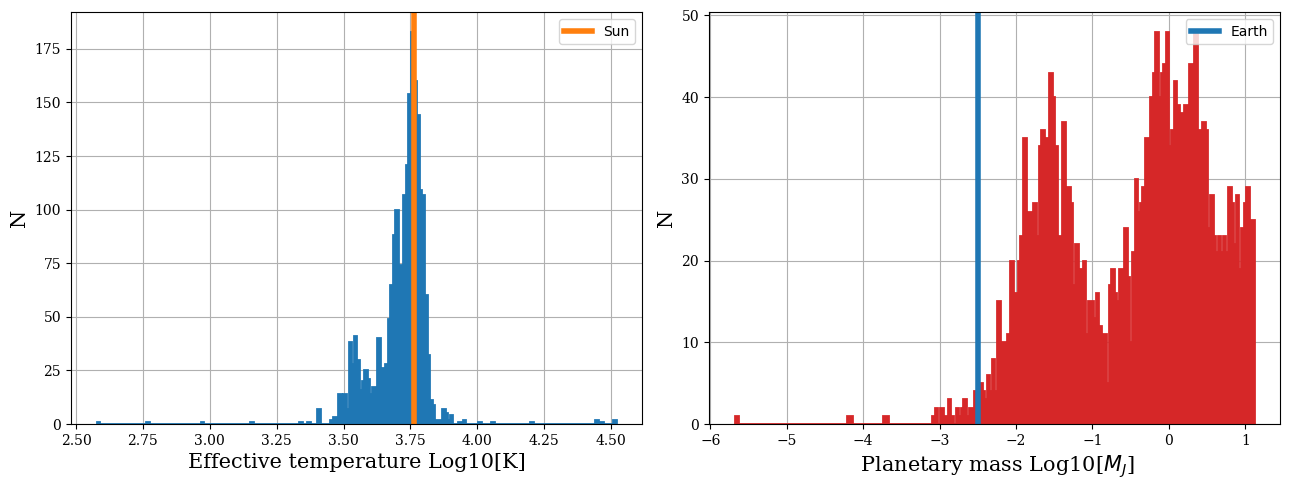

In [10]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data_filtered['star_teff']
plt.hist(np.log10(d), bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(5778), color='C1', lw=4, label='Sun')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax1.set_xlabel("Effective temperature Log10[K]", size=15,family='serif')
ax1.set_ylabel('N', size=15,family='serif')
plt.grid(True)
plt.legend()
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d1 = data_filtered['mass']
plt.hist(np.log10(d1), bins=200, histtype='step', color='C3', fill=True, linewidth=2)
plt.axvline(np.log10(1/317.83), color='C0', lw=4, label='Earth')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax2.set_xlabel(' Planetary mass Log10[$M_J$]', size=15,family='serif')
ax2.set_ylabel('N', size=15,family='serif')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

##### 6. Describe the plots that you created in #5. What can you conclude from these plots? Brielfy explain your conclusions.

In the initial plot, the temperature range of host stars is predominantly between 3.5 Log10(K) and 3.9 Log10(K) approximately, after excluding outliers, with a concentration in this interval for most planets. Additionally, the mass distribution of the planets generally aligns with Jupiter's mass, extending up to 2 $Log10(M_J)$. These observations lead to several conclusions. Firstly, a great number of host stars share similarities with our Sun (see first histogram), evident from their temperature around 5500 K. The second histogram illustrates the distribution of planet masses, reinforcing the earlier inference that, in a majority of cases, these masses align with Jupiter's. Furthermore, the analysis reveals that, on average, the planets in this data base possess greater mass than Earth.

##### 7. In class we discussed that planets, in particular gas giants, are more common around metall rich stars. Can you show some evidence for this using histograms, scatter plots and number counts? Tip: You may want to select specific data for this.

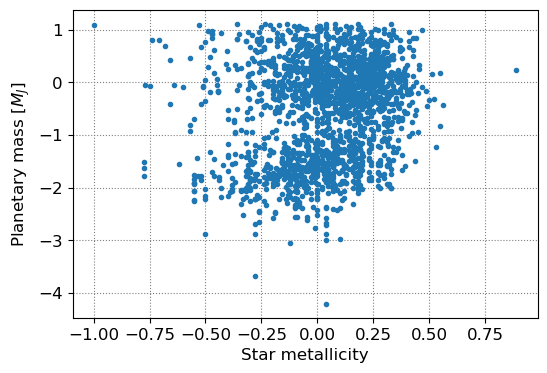

In [11]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data_filtered['star_metallicity'],np.log10(data_filtered['mass']),  marker = '.', linestyle='')
plt.xlabel("Star metallicity", fontsize=12)
plt.ylabel('Planetary mass [$M_J$]', fontsize=12)
#plt.xlim(0,0.6)
#plt.ylim(-1,1)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

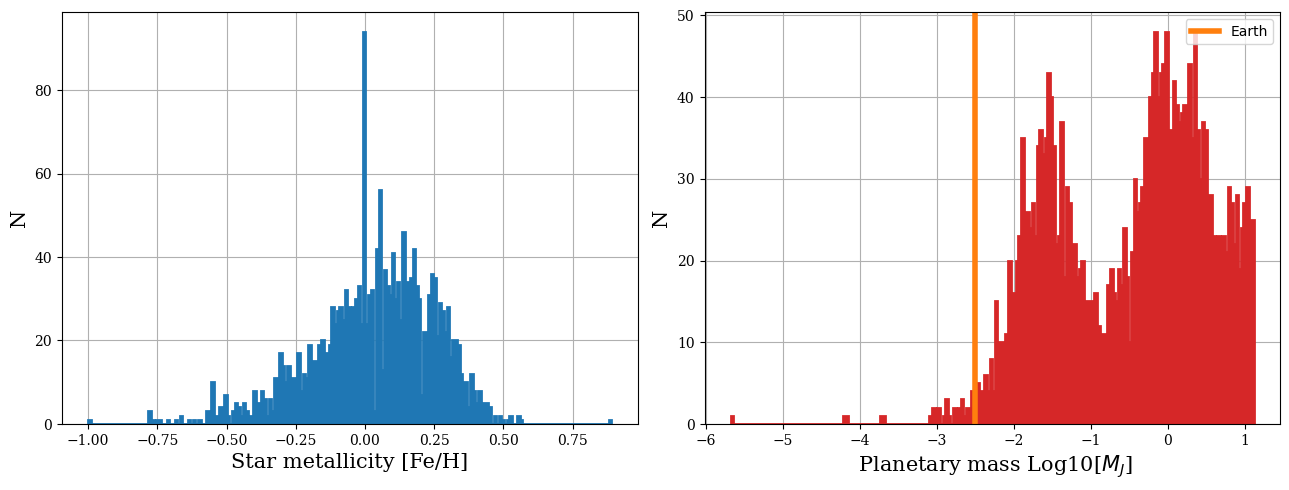

In [12]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data_filtered['star_metallicity']
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax1.set_xlabel("Star metallicity [Fe/H]", size=15,family='serif')
ax1.set_ylabel('N', size=15,family='serif')
plt.grid(True)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d1 = data_filtered['mass']
plt.hist(np.log10(d1), bins=200, histtype='step', color='C3', fill=True, linewidth=2)
plt.axvline(np.log10(1/317.83), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax2.set_xlabel(' Planetary mass Log10[$M_J$]', size=15,family='serif')
ax2.set_ylabel('N', size=15,family='serif')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [13]:
#number counts for rich-metallicity
counts = data[(data['star_metallicity'] >= 0) & (np.log10(data['mass']) >= -0.5)].shape[0]
#print(counts)
#number counts for poor-metallicity
counts2 = data[(data['star_metallicity'] < 0) & (np.log10(data['mass'])>= -0.5)].shape[0]
#print(counts2)
print(counts - counts2)

470


##### 8. Briefly explain and describe what you found based on the plots in #7.
The plots above can provide evidence supporting the idea that gas giants are more common around metal-rich stars. In the scatter plot, we observe a higher concentration of planets with metallicity values above 0, as well as Log10[$M_J$] values greater than -0.5 (an approximate mass value for Saturn in our Solar system), indicating the potential presence of gas giants. The histograms of mass reveal a significant number of gas giant planets, while metallicity follows a Gaussian distribution. To obtain a more quantitative measure, we counted the number of planets exhibiting characteristics consistent with gas giants and varying the metallicity. Our analysis shows that there are more planets with masses like gas giants around metal-rich stars compared to metal-poor stars.

##### 9. Make a scatter plot of mass vs. radius. Make sure to have both axes in log scale.

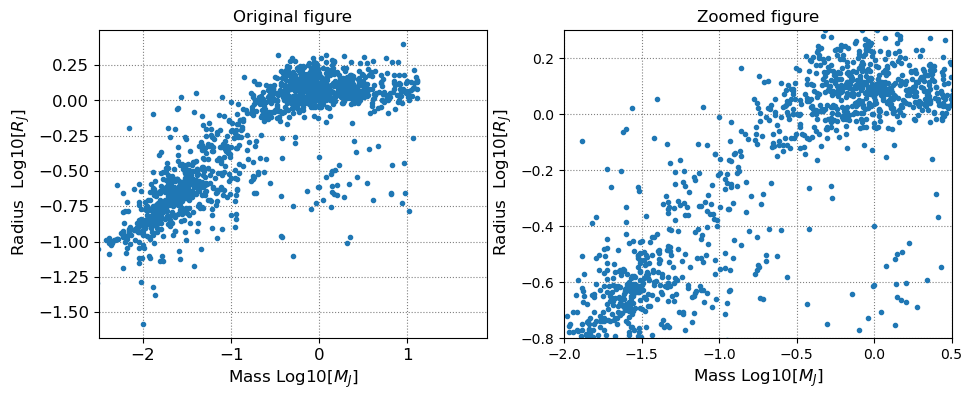

In [14]:
fig = plt.figure(figsize=(11, 4))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,2,1)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log10(data_filtered['mass']), np.log10(data_filtered['radius']), marker = '.', linestyle='')
plt.xlabel("Mass Log10[$M_J$]", fontsize=12)
plt.ylabel(' Radius  Log10[$R_J$]', fontsize=12)
plt.xlim(-2.5,1.9)
plt.title('Original figure')
ax.tick_params(axis='both', which='major', labelsize=12)


ax2 = fig.add_subplot(1,2,2)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log10(data_filtered['mass']), np.log10(data_filtered['radius']), marker = '.', linestyle='')
plt.xlabel("Mass Log10[$M_J$]", fontsize=12)
plt.ylabel(' Radius  Log10[$R_J$]', fontsize=12)
plt.xlim(-2,0.5)
plt.ylim(-0.8,0.3)
plt.title('Zoomed figure')
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()


##### 10. There is a known gap in the radius of planets. Can you find where this gap is in the plot from #9? Is there also a gap in the mass of planets? What does this suggest?


It appears that there may be a discernible gap in radius within the range of -0.45 to -0.25 Log10[$R_J$]. This observation is evident when comparing both the original and zoomed figures, where a noticeable reduction in the number of data points is apparent in this specific region along the radius axis. Consequently, we might categorize this interval as a gap. Similarly, in the mass distribution plot, there is another observable gap located roughly between -1.25 to -0.75 Log10[$M_J$].

Several hypotheses can be considered to explain these gaps. Firstly, technological limitations in the detection of planets possessing these particular characteristics may contribute to the observed gaps. Alternatively, astrophysical phenomena could play a role, it is feasible that planets with magnitudes falling within these ranges may not be stable during their formation process, leading to a decreased of planetary formation. Additionally, the gravitational influence of larger planets could be a factor, with their accretion of a significant amount of material potentially hindering the formation of planets in these specific regions—such as an asteroid belt scenario.

##### 11. Is there anything else that you can conclude from #9? Mark where the gap is, you can use a square or a circle on the figure. Briefly explain your observation.

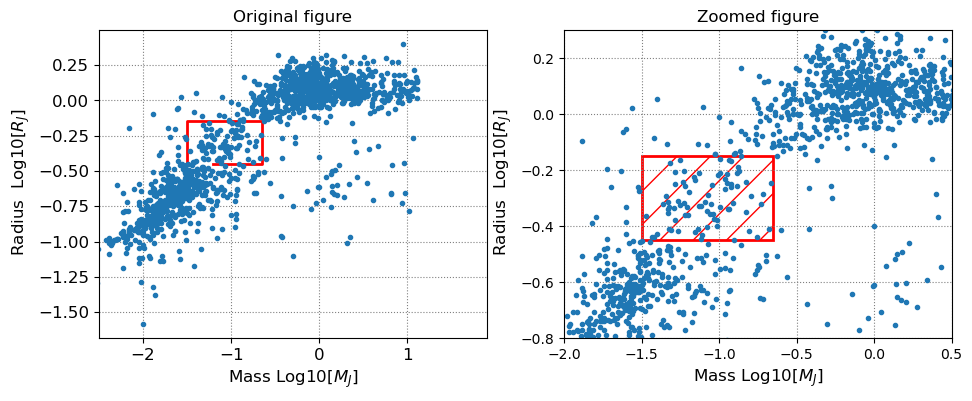

In [15]:
# coordinates to show the gap
x = [-1.5, -1.5, -0.65, -0.65, -1.2]
y = [-0.45, -0.15, -0.15, -0.45, -0.45]

fig = plt.figure(figsize=(11, 4))

ax = fig.add_subplot(1,2,1)
plt.grid(linestyle=':', color='grey')
plt.plot(x, y, color='red', linewidth=2)
plt.plot(np.log10(data_filtered['mass']), np.log10(data_filtered['radius']), marker = '.', linestyle='')
plt.xlabel("Mass Log10[$M_J$]", fontsize=12)
plt.ylabel(' Radius  Log10[$R_J$]', fontsize=12)
plt.xlim(-2.5,1.9)
plt.title('Original figure')
ax.tick_params(axis='both', which='major', labelsize=12)

#zoomed figure
ax2 = fig.add_subplot(1,2,2)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log10(data_filtered['mass']), np.log10(data_filtered['radius']), marker = '.', linestyle='')
plt.fill(x, y, edgecolor='red', hatch='/', facecolor='none', linewidth= 2)
plt.xlabel("Mass Log10[$M_J$]", fontsize=12)
plt.ylabel(' Radius  Log10[$R_J$]', fontsize=12)
plt.xlim(-2,0.5)
plt.ylim(-0.8,0.3)
plt.title('Zoomed figure')
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()

Another observation that can be drawn from #9 is that there appears to be a logarithmic relationship between mass and radius in the distribution.

##### 12. Calculate the density of the exoplanets and make a histogram. Compare the histogram with the density of Earth and Jupiter. What do you find?

According to the notebooks on github repository, the mas of the Earth is $\frac{1}{317.83}M_J$ and the radius is $0.0892147 R_J$, thus the density is: $4.43094\frac{M_J}{R_J^3}$

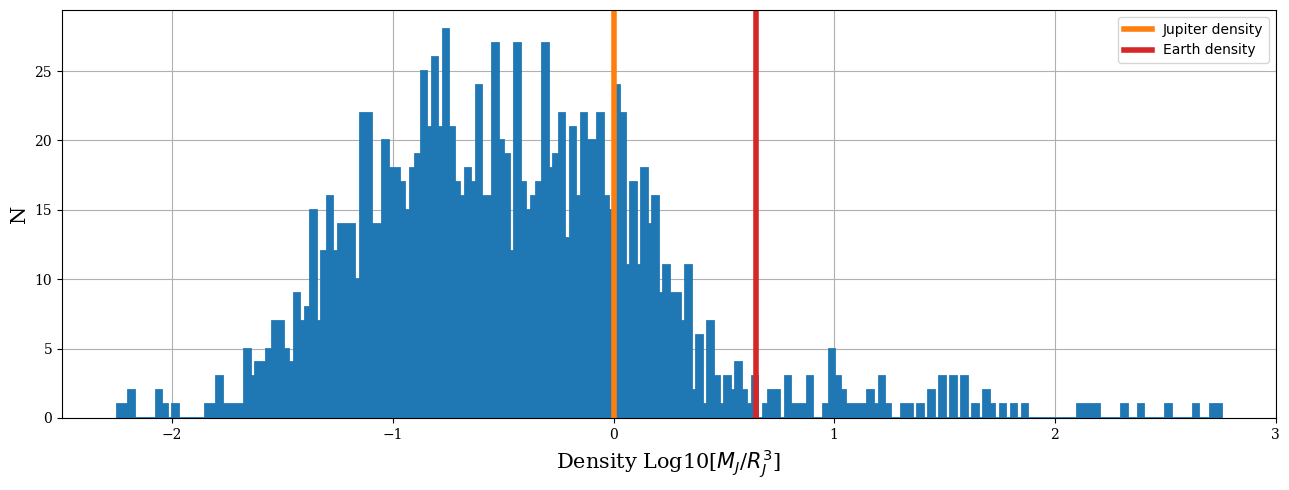

In [16]:
#calculating volume
vol = (4/3)*np.pi*(data_filtered['radius'])**3

#calculating density
den = data_filtered['mass']/vol

#making the histogram

fig = plt.figure(figsize=(13.,5.))
plt.hist(np.log10(den), bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(1), color='C1', lw=4, label='Jupiter density')
plt.axvline(np.log10(4.43094), color='C3', lw=4, label='Earth density')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
plt.xlabel("Density Log10[$M_J$/$R_J^3$]", size=15,family='serif')
plt.ylabel('N', size=15,family='serif')
plt.legend()
plt.grid(True)
plt.tight_layout()

Many planets exhibit lower density compared to Jupiter and Earth, so they could be gaseous planets. Additionally, there exist planets with densities falling between those of Jupiter and Earth. Moreover, we encounter rocky planets, distinguished by densities equal to or greater than that of Earth.

##### 13. Where are planets found? Plot the on sky position (R.A. and Dec) of all known exoplanets. What can you conclude from this?


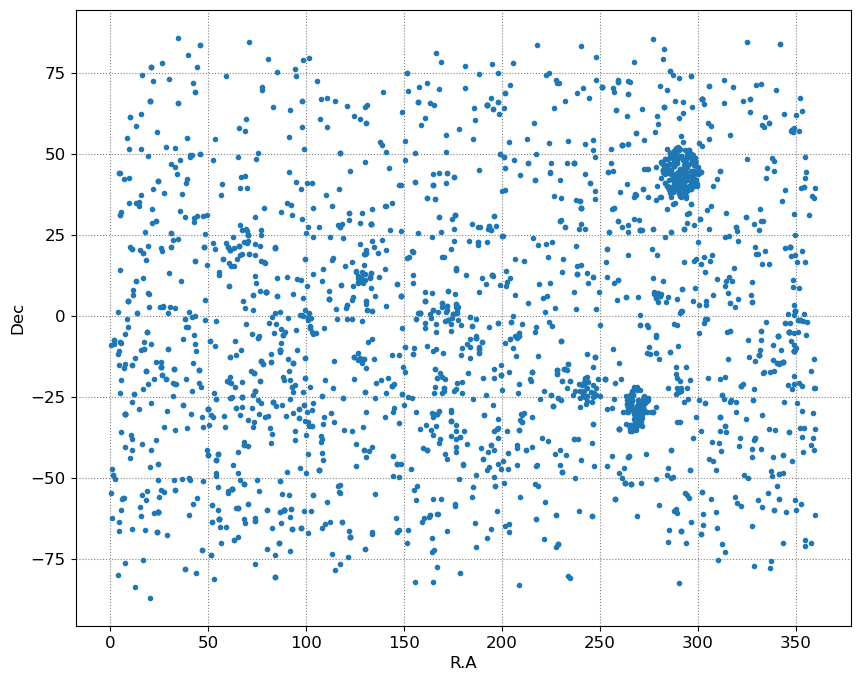

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data_filtered['ra'],data_filtered['dec'],  marker = '.', linestyle='')
plt.xlabel("R.A", fontsize=12)
plt.ylabel('Dec', fontsize=12)
#plt.xlim(0,0.6)
#plt.ylim(-1,1)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In the plot, clear planet clusters are seen between Right Ascension (R.A) 250 to 300 and Declination (Dec) -30 to -25 and 30 to 50. Smaller groups are also noted around the equator, specifically between -25 to 25 in R.A. In conclusion, most planets are detected in the Eastern sky view, with a notable presence in the regions mentioned before. Additionally, there are some other clusters of planets in the center.

##### 14. Plot histograms of the host stars distance, mass and temperature.

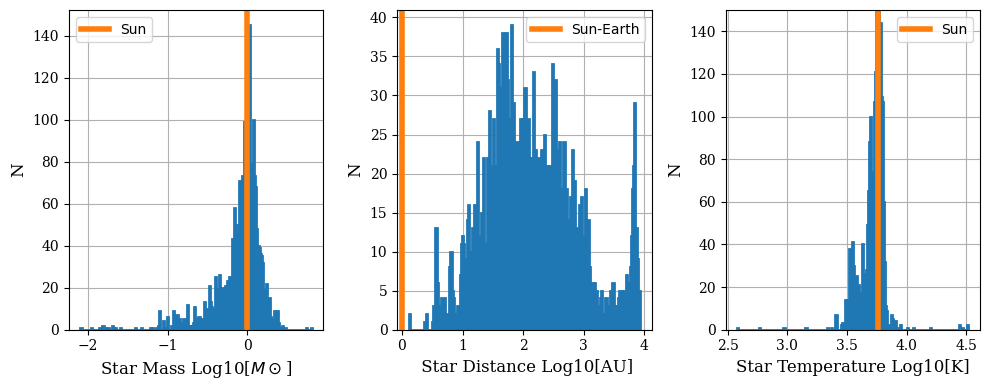

In [18]:
fig = plt.figure(figsize=(10,4))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,3,1)
d = data_filtered['star_mass']
plt.hist(np.log10(d), bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(1), color='C1', lw=4, label='Sun')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax1.set_xlabel("Star Mass Log10[$M \odot$]", size=12,family='serif')
ax1.set_ylabel('N', size=12,family='serif')
plt.grid(True)
plt.legend()
plt.tight_layout()

ax2 = fig.add_subplot(1,3,2)
d1 = data_filtered['star_distance']
plt.hist(np.log10(d1), bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(1), color='C1', lw=4, label='Sun-Earth')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax2.set_xlabel(' Star Distance Log10[AU]', size=12,family='serif')
ax2.set_ylabel('N', size=12,family='serif')
plt.grid(True)
plt.legend()
plt.tight_layout()

ax3 = fig.add_subplot(1,3,3)
d2 = data_filtered['star_teff']
plt.hist(np.log10(d2), bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(5778), color='C1', lw=4, label='Sun')
plt.xticks(family='serif',size=10)
plt.yticks(family='serif',size=10)
ax3.set_xlabel('Star Temperature Log10[K]', size=12,family='serif')
ax3.set_ylabel('N', size=12,family='serif')
plt.ylim(0,150)
plt.grid(True)
plt.tight_layout()

plt.legend()
plt.show()

##### 15. What can you conclude from the plots in #14? Are these conclusions physically meaningfull or the result of some bias?

While the major are Sun-like stars in the case of mass and temperature, and as the quantity of planets with less mass that the Sun seem to be greater, also the temperature must be correlated, and it is the case because we have temperatures less than our star, which seems to be physically correct. On the other hand, the distance distribution is to large in comparison with the distance of the Earth to Sun, and there are not planets that has the same distance with their host star as Earth with Sun, that could be affected by some outlier values.

### 2. (5 points) Finding Exoplanets in transit data

##### 1. Follow the tutorial and download data from the Kepler mission for the star: Kepler-23.

In [19]:
import lightkurve as lk
%matplotlib inline

In [20]:
# Search for Kepler observations of Kepler-23
search_result = lk.search_lightcurve('Kepler-23', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()

##### 2. Prepare the data to search for planets, for this normalize the flux and remove the outliers.

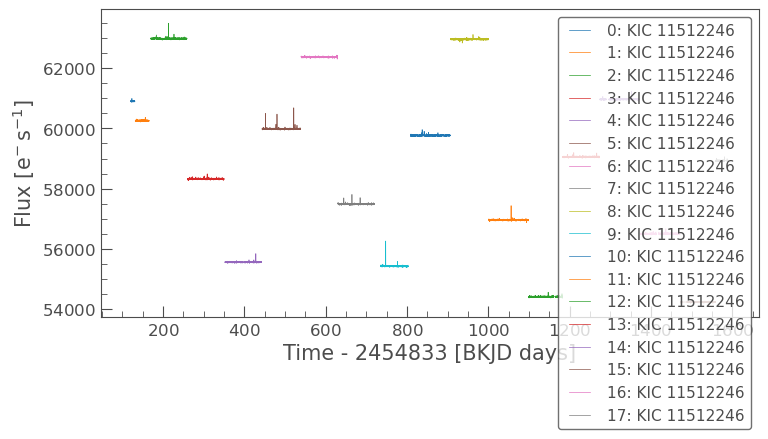

In [21]:
lc_collection.plot();

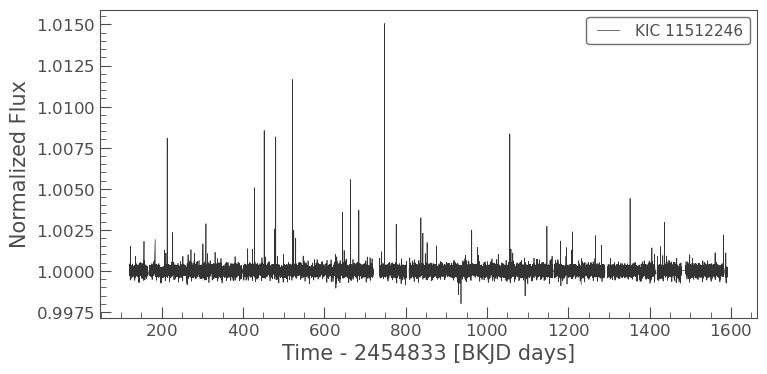

In [22]:
lc = lc_collection.stitch()
lc.plot();

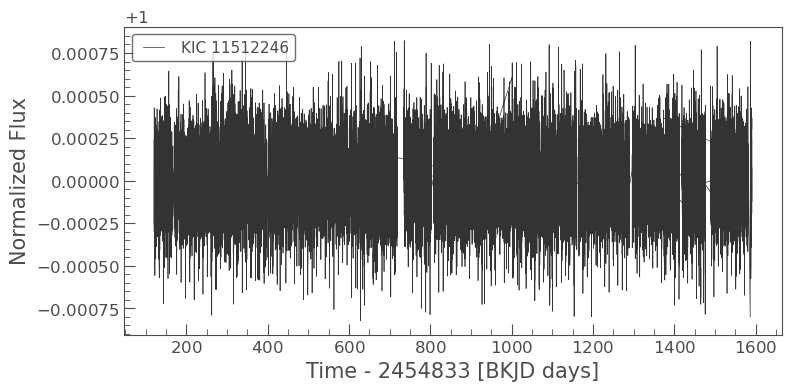

In [23]:
# Flatten the light curve and remove outliers
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

##### 3. Search for planets in the data. How many planets can you find in the dataset?

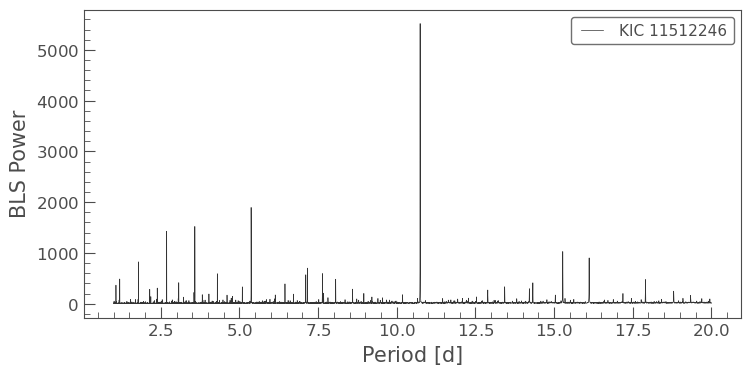

In [24]:
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [25]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

10.742274227422742 d
122.55364229753526
0.25 d


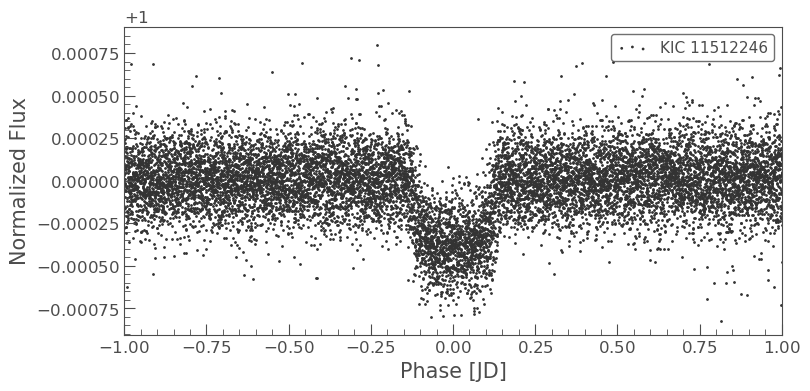

In [26]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-1, 1);

In [27]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur)

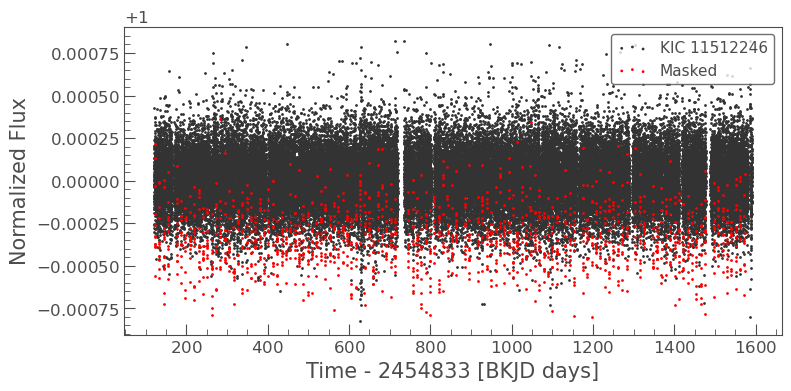

In [28]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');

In [29]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur)

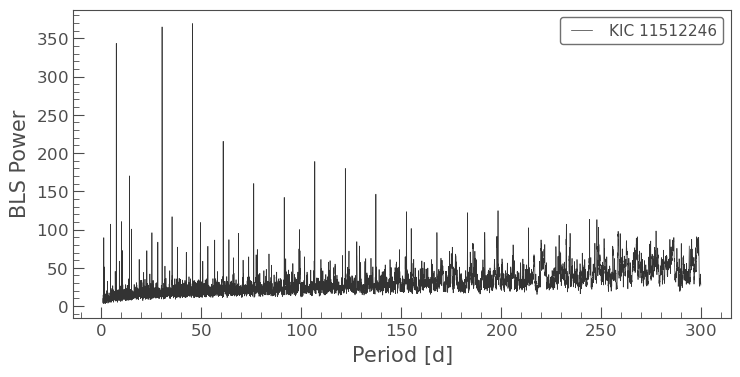

In [30]:
period = np.linspace(1, 300, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

In [31]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period
planet_c_period

<Quantity 45.82458246 d>

In [32]:
#Multiples for the two known planets
planet1 = []
planet2 = []
for i in range (2,10,1):
    planet1.append(10.742274227422742/i)
    planet2.append(45.824582/i)
    
print('Planet 1:', planet1, '; Planet 2:', planet2)
    

Planet 1: [5.371137113711371, 3.5807580758075805, 2.6855685568556855, 2.1484548454845482, 1.7903790379037903, 1.5346106039175347, 1.3427842784278428, 1.1935860252691937] ; Planet 2: [22.912291, 15.274860666666667, 11.4561455, 9.1649164, 7.6374303333333335, 6.546368857142857, 5.72807275, 5.091620222222222]


To discover additional planets, we must search within a specific range of periods that are not multiples of the periods of the planets we have already identified.

In [33]:
# list for periods
planet_d_periods_list = []

# loop for finding periods
for max_period in range(300, 1000, 100):
    period = np.linspace(1, max_period, 10000)
    bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
    
    planet_d_periods_list.append(bls.period_at_max_power)

print(planet_d_periods_list)

[<Quantity 45.82458246 d>, <Quantity 7.10531053 d>, <Quantity 15.27282728 d>, <Quantity 61.08570857 d>, <Quantity 14.21242124 d>, <Quantity 45.82838284 d>, <Quantity 497.74717472 d>]


Here we discard the first and the sixth periods, because are the same as period of planet c or 2.

In [34]:
#Multiples of new periods

planet3 = [7.10531053] #Too small for searchig for multiples, so we print it just to see the value.
planet4 = []
planet5 = []
planet6 = []
planet7 = []

for i in range (2,10,1):
    planet4.append(15.27282728/i)
    planet5.append(61.08570857/i)
    planet6.append(14.21242124/i)
for i in range (2,36,1):
    planet7.append(497.74717472/i)
    
print('Planet 3 period:', planet3)
print('Planet 4:', planet4)
print('Planet 5:', planet5)
print('Planet 6:', planet6)
print('Planet 7:', planet7)

Planet 3 period: [7.10531053]
Planet 4: [7.63641364, 5.0909424266666665, 3.81820682, 3.0545654559999997, 2.5454712133333333, 2.1818324685714283, 1.90910341, 1.696980808888889]
Planet 5: [30.542854285, 20.361902856666667, 15.2714271425, 12.217141714, 10.180951428333334, 8.726529795714287, 7.63571357125, 6.787300952222222]
Planet 6: [7.10621062, 4.737473746666667, 3.55310531, 2.842484248, 2.3687368733333334, 2.0303458914285715, 1.776552655, 1.5791579155555555]
Planet 7: [248.87358736, 165.91572490666667, 124.43679368, 99.549434944, 82.95786245333333, 71.10673924571428, 62.21839684, 55.305241635555554, 49.774717472, 45.249743156363635, 41.47893122666667, 38.28824420923077, 35.55336962285714, 33.183144981333335, 31.10919842, 29.279245571764704, 27.652620817777777, 26.197219722105263, 24.887358736, 23.702246415238093, 22.624871578181818, 21.641181509565218, 20.739465613333333, 19.9098869888, 19.144122104615384, 18.435080545185183, 17.77668481142857, 17.16369568, 16.591572490666668, 16.05636

Here we can see that planet 6 is multiple of planet 3

The planet 2 is multiple of planet 4, and planet 5 is multiple of 4 planet.

Finally, planet 7 is close to be multiple of planet 6.

Therefore, planet 1 is identified as a planet, as planets 2, 4 and 5 are the same it is consides as the second identified planet, finally planets 3, 6 and 7 are multiples they are considered the third detectec planet. **Thus, we have 3 identified planets.**


<Quantity 7.10531053 d>

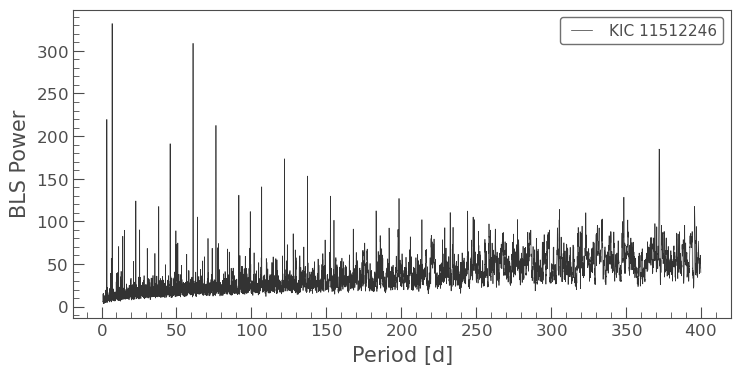

In [35]:
#With the third planet detected we do the plot
period = np.linspace(1, 400, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();
planet_d_period = bls.period_at_max_power
planet_d_t0 = bls.transit_time_at_max_power
planet_d_dur = bls.duration_at_max_power

# Check the value for period
planet_d_period

##### 4. Make a plot of the folded lightcurve for all identified planets.

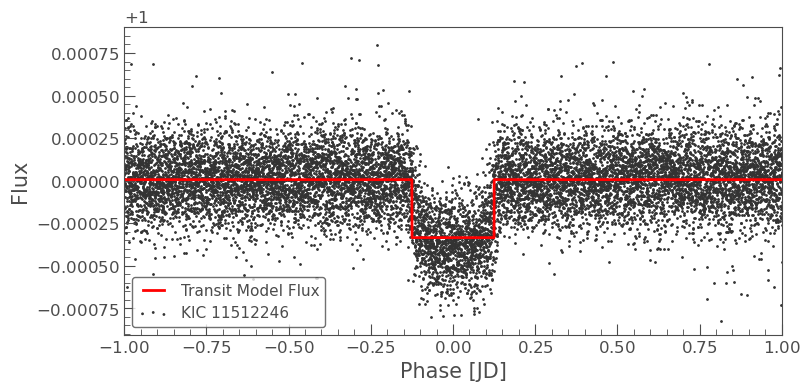

In [36]:
#Planet b
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-1, 1);

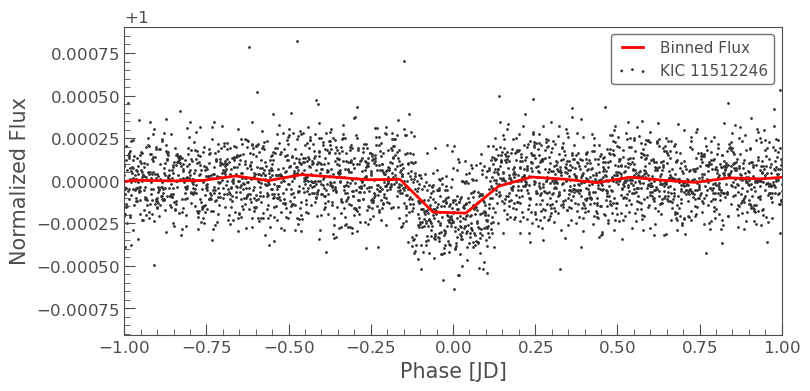

In [37]:
#Planet c
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2, 
                                                          label='Binned Flux')
ax.set_xlim(-1, 1);

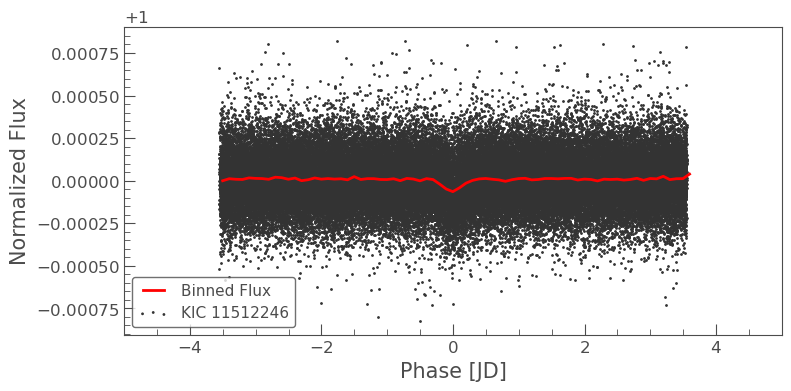

In [38]:
#Planet d
ax = masked_lc.fold(planet_d_period, planet_d_t0).scatter()
masked_lc.fold(planet_d_period, planet_d_t0).bin(.1).plot(ax=ax, c='r', lw=2, 
                                                          label='Binned Flux')
ax.set_xlim(-5, 5);

##### 5. Include the model for all of the planets in the folded lightcurve plot.

In [39]:
#Model for c
planet_c_model = bls.get_transit_model(period=planet_c_period, transit_time=planet_c_t0, duration=planet_c_dur)
#Model for d
planet_d_model = bls.get_transit_model(period=planet_d_period, transit_time=planet_d_t0, duration=planet_d_dur)

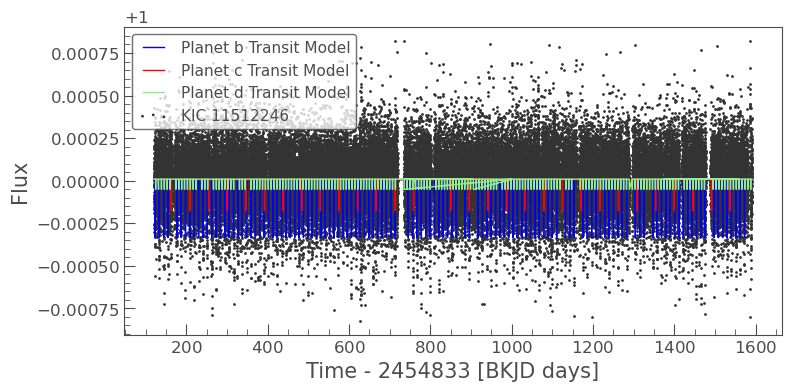

In [40]:
ax = lc.scatter();
planet_b_model.plot(ax=ax, c='b', label='Planet b Transit Model', linewidth=1);
planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model', linewidth=1);
planet_d_model.plot(ax=ax, c='lightgreen', label = 'Planet d Transit Model', linewidth=1);

### References. - 

All information retrieved from: https://github.com/helgadenes/Astrophysical_Objects_yachay/tree/main